In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/baseball.csv')
Data_Day

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# EXPLORATORY DATA ANALYSIS

In [5]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [6]:
Data_Day.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
#Data Types of Varaibles
print(Data_Day.dtypes)

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [8]:
#Dimension
Data_Day.shape

(30, 17)

In [9]:
# Index range
Data_Day.index

RangeIndex(start=0, stop=30, step=1)

In [10]:
#columns 
Data_Day.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [11]:
#unique values present in each variable
Data_Day.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [12]:
# casual and registered variables can be removed, as these two sums to dependent variable count
#Data_Day = Data_Day.drop(Data_Day.columns[[0, 1, 2,3, 4]], axis = "columns")
#print(Data_Day.shape)

In [13]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
#categorical_var = []

# DATA PRE PROCESSING

In [14]:
#sum of missing values 
Data_Day.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [15]:
#Outlier analysis

W


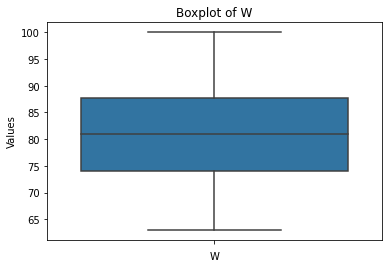

R


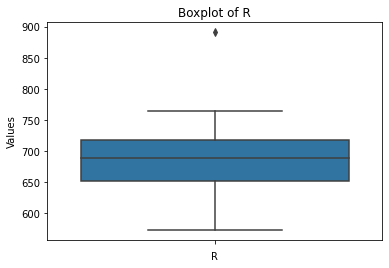

AB


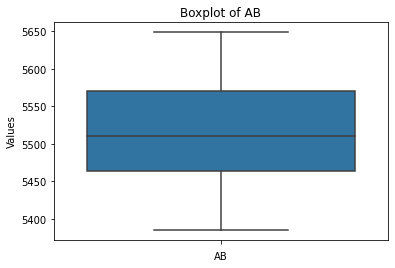

H


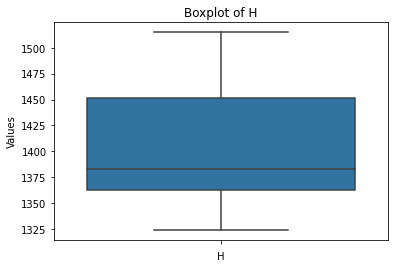

2B


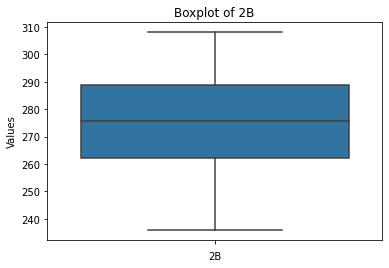

3B


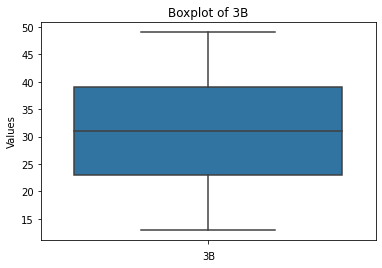

HR


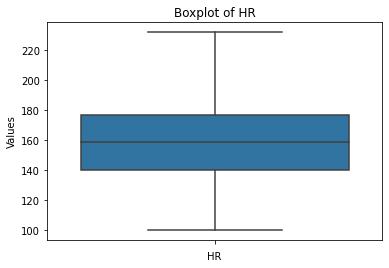

BB


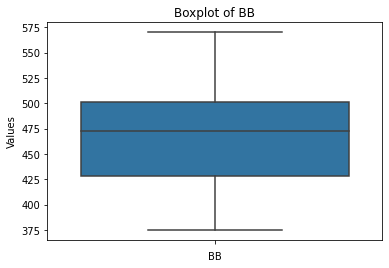

SO


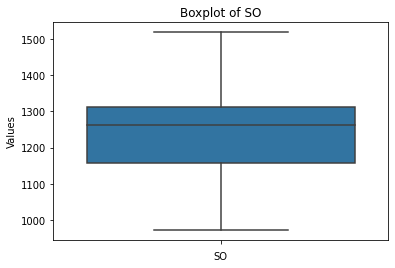

SB


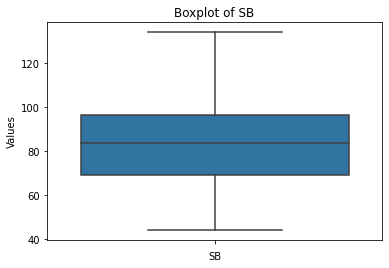

RA


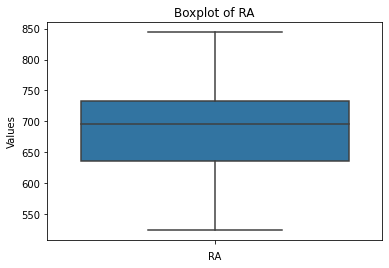

ER


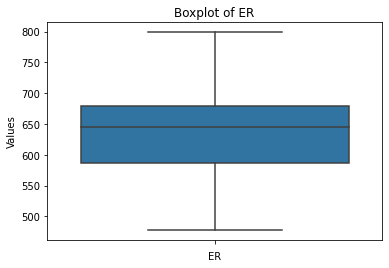

ERA


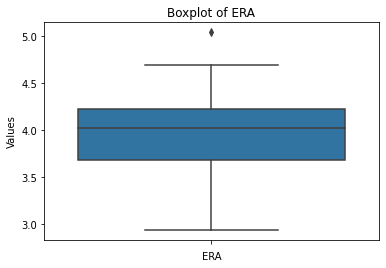

CG


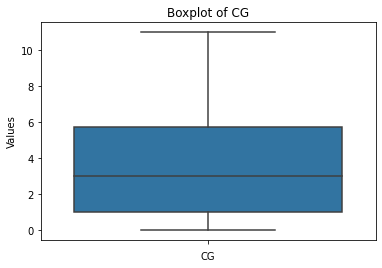

SHO


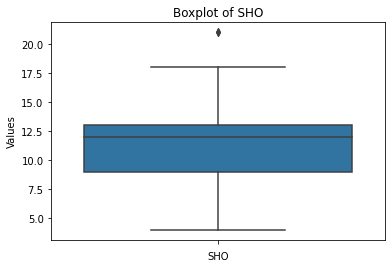

SV


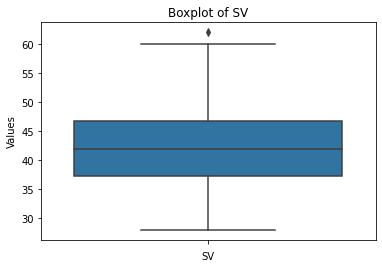

E


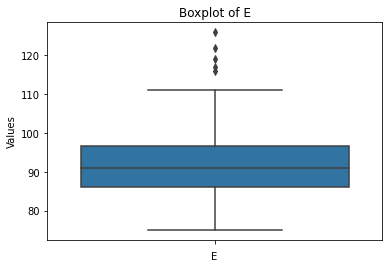

In [16]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [17]:
##We are getting to know that outliers are in R, ERA, SHO & E. Since the data has very less number of observations we would
#need to remove them otherwise they may affect our further insights & therefore final results/outcomes.

In [18]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

W
Innerfence= 53.375
Upperfence= 108.375
IQR =13.75
R
Innerfence= 550.75
Upperfence= 818.75
IQR =67.0
AB
Innerfence= 5305.0
Upperfence= 5729.0
IQR =106.0
H
Innerfence= 1230.25
Upperfence= 1584.25
IQR =88.5
2B
Innerfence= 222.5
Upperfence= 328.5
IQR =26.5
3B
Innerfence= -1.0
Upperfence= 63.0
IQR =16.0
HR
Innerfence= 85.125
Upperfence= 232.125
IQR =36.75
BB
Innerfence= 318.75
Upperfence= 610.75
IQR =73.0
SO
Innerfence= 926.5
Upperfence= 1542.5
IQR =154.0
SB
Innerfence= 27.75
Upperfence= 137.75
IQR =27.5
RA
Innerfence= 491.875
Upperfence= 876.875
IQR =96.25
ER
Innerfence= 449.25
Upperfence= 817.25
IQR =92.0
ERA
Innerfence= 2.8762499999999993
Upperfence= 5.026250000000001
IQR =0.5375000000000005
CG
Innerfence= -6.125
Upperfence= 12.875
IQR =4.75
SHO
Innerfence= 3.0
Upperfence= 19.0
IQR =4.0
SV
Innerfence= 23.0
Upperfence= 61.0
IQR =9.5
E
Innerfence= 69.875
Upperfence= 112.875
IQR =10.75


In [19]:
Data_Day.isnull().sum()

W      0
R      1
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    1
CG     0
SHO    2
SV     1
E      5
dtype: int64

In [20]:
# total 10 outliers found. Now, impute the values, by the help of median.
Data_Day['R'] = Data_Day['R'].fillna(Data_Day['R'].median())
Data_Day['ERA'] = Data_Day['ERA'].fillna(Data_Day['ERA'].median())
Data_Day['SHO'] = Data_Day['SHO'].fillna(Data_Day['SHO'].median())
Data_Day['SV'] = Data_Day['SV'].fillna(Data_Day['SV'].median())
Data_Day['E'] = Data_Day['E'].fillna(Data_Day['E'].median())

In [21]:
# Check NA Values
Data_Day.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [22]:
!pip install klib

            W         R        AB  ...       SHO        SV         E
W    1.000000  0.387826 -0.087947  ...  0.331826  0.559777  0.070884
R    0.387826  1.000000  0.437099  ... -0.095824  0.139292 -0.004944
AB  -0.087947  0.437099  1.000000  ... -0.014841 -0.072057  0.202137
H    0.037612  0.427267  0.739122  ...  0.039411 -0.114580 -0.134902
2B   0.427797  0.450903  0.453370  ...  0.162473  0.116796  0.027835
3B  -0.251118  0.121372  0.435422  ...  0.014894 -0.235764 -0.043941
HR   0.307407  0.549030 -0.066983  ... -0.130004  0.054379 -0.019243
BB   0.484342  0.254094 -0.136414  ...  0.188155  0.044795  0.081870
SO   0.111850  0.074217 -0.106022  ...  0.015864  0.122981  0.319990
SB  -0.157234  0.076416  0.372618  ... -0.076583 -0.140158 -0.035632
RA  -0.812952 -0.015352  0.316010  ... -0.566512 -0.457614  0.093355
ER  -0.809435  0.005408  0.309686  ... -0.551732 -0.429211  0.043196
ERA -0.809684 -0.120381  0.217427  ... -0.438233 -0.424816 -0.047125
CG   0.080533  0.106058 -0.080876 

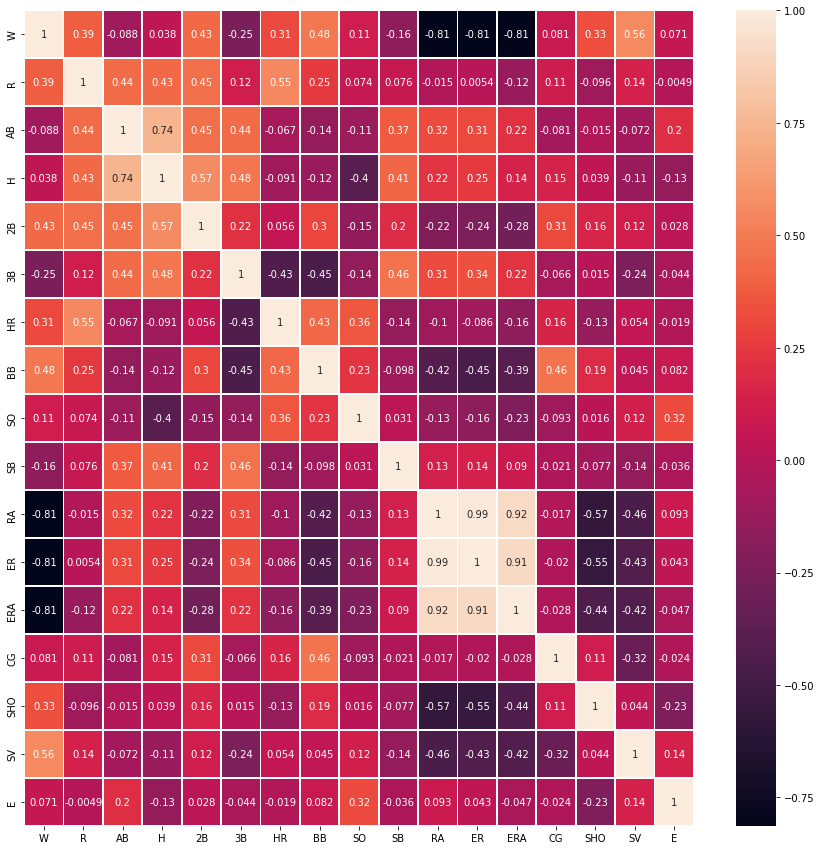

In [23]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(15,15)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=.8)

In [24]:
import klib
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value

No missing values found in the dataset.


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


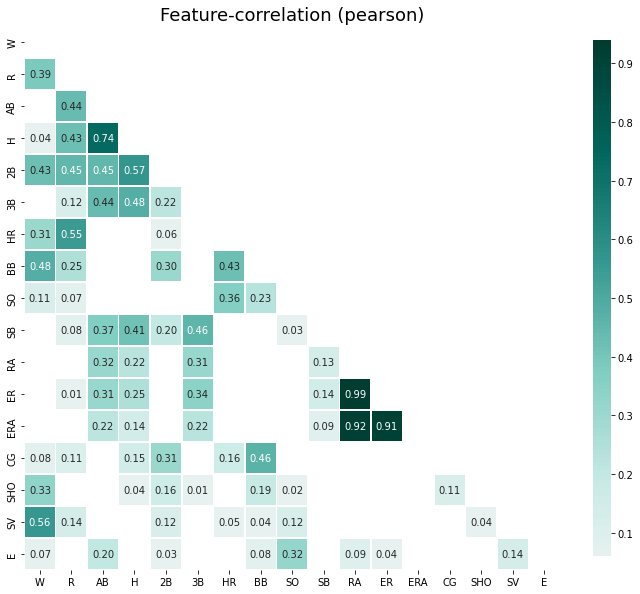

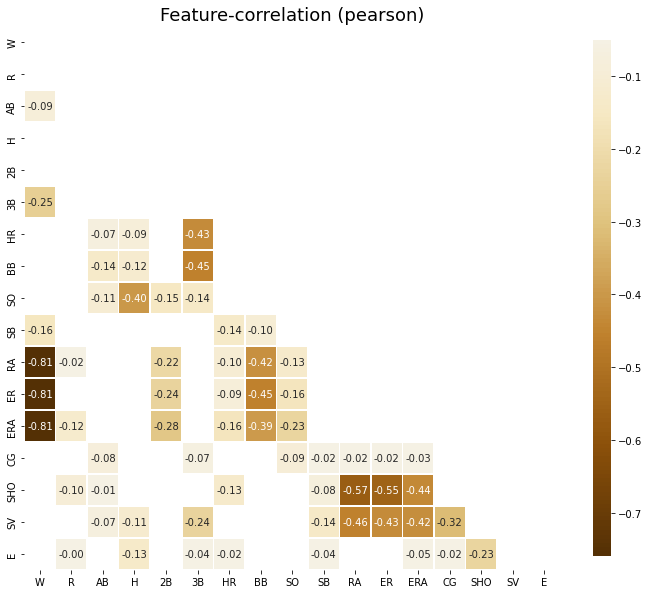

In [25]:
klib.corr_plot(Data_Day, split="pos")
klib.corr_plot(Data_Day, split="neg")

In [26]:
Data_Day.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,681.500000,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.922333,3.466667,10.633333,42.366667,89.333333
std,10.453455,44.590667,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.405766,2.763473,3.167544,7.014681,7.507850
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.020000,3.000000,11.000000,41.000000,90.000000
75%,87.750000,710.500000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.155000,5.750000,12.000000,45.750000,93.000000
max,100.000000,764.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,4.690000,11.000000,18.000000,60.000000,111.000000


So in this way upon having the look at correlation graphs we can eaisly interprate that E, CG, H, AB are having very poor relationship with the target variable W. Similarly RA, ER & ERA are shring strong relationship numbers with each other which may which may affect the model performance & it's complexity. Therefore we would need to remove either two amongst these three variables from the dataframe.

In [27]:
Data_Day.drop(['E', 'CG', 'H', 'AB', 'RA', 'ER'], axis='columns', inplace = True)
Data_Day

,W,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV
0,95.0,724.0,300.0,42.0,139.0,383.0,973.0,104.0,3.73,8.0,56.0
1,83.0,696.0,277.0,44.0,156.0,439.0,1264.0,70.0,4.07,12.0,45.0
2,81.0,669.0,303.0,29.0,141.0,533.0,1157.0,86.0,3.67,10.0,38.0
3,76.0,622.0,260.0,27.0,136.0,404.0,1231.0,68.0,3.98,9.0,37.0
4,74.0,689.0,289.0,49.0,151.0,455.0,1259.0,83.0,4.64,12.0,35.0
5,93.0,689.0,308.0,17.0,232.0,570.0,1151.0,88.0,3.80,10.0,34.0
6,87.0,764.0,272.0,19.0,212.0,554.0,1227.0,63.0,4.03,4.0,48.0
7,81.0,713.0,246.0,20.0,217.0,418.0,1331.0,44.0,4.05,10.0,43.0
8,80.0,644.0,278.0,32.0,167.0,436.0,1310.0,87.0,3.74,12.0,60.0
9,78.0,748.0,294.0,33.0,161.0,478.0,1148.0,71.0,4.31,10.0,40.0


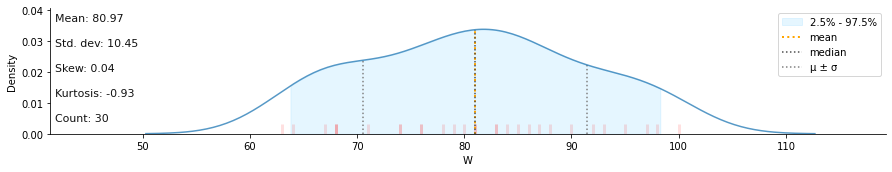

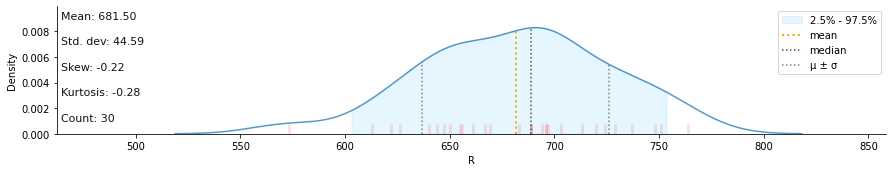

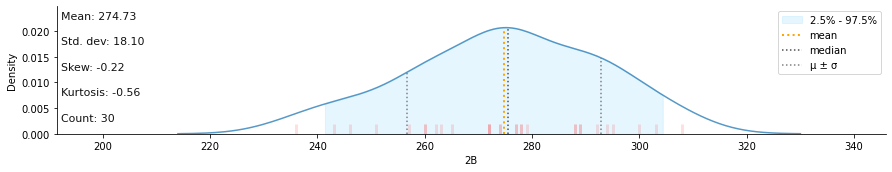

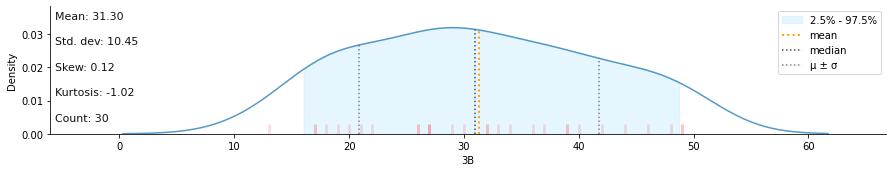

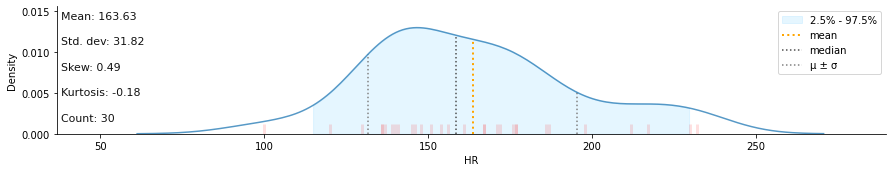

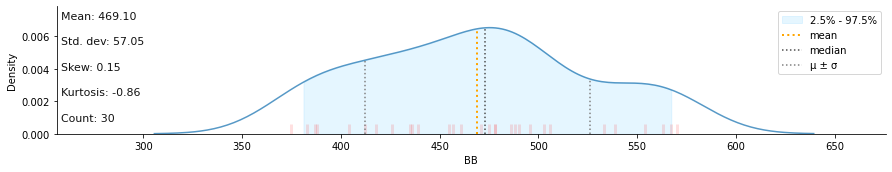

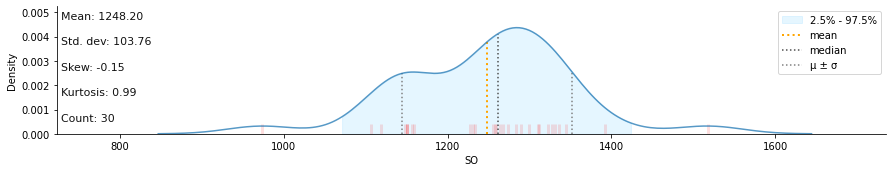

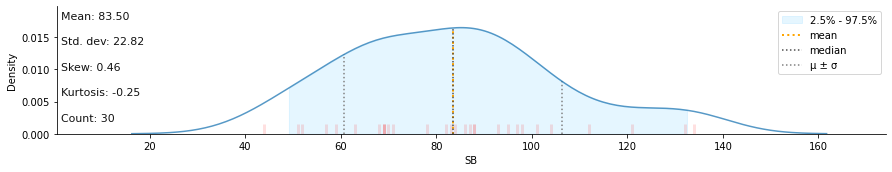

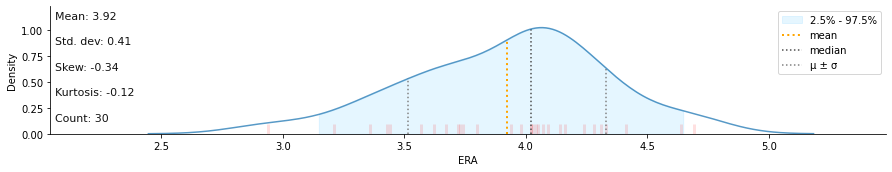

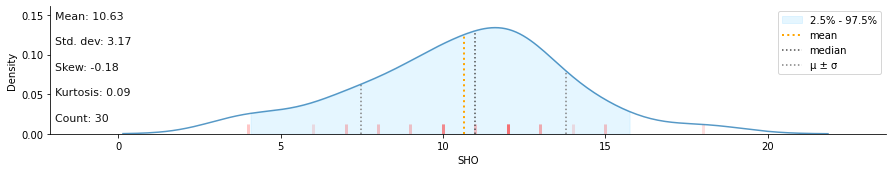

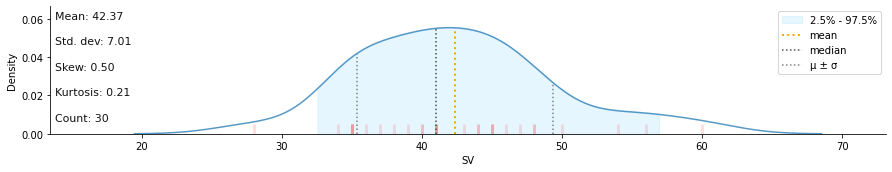

In [28]:
#Feature scalling
klib.dist_plot(Data_Day)

In [29]:
##Here in the above plots we can eaisly infer that only CG & H are the two variables where the data is slightly skewed, which can be ignored as the skeness is very poor.

In [30]:
!pip install pycaret

In [31]:
from pycaret.regression import *
s = setup(Data_Day, target = 'W')

,Description,Value
0,session_id,7845
1,Target,W
2,Original Data,"(30, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(20, 10)"


In [32]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [33]:
# compare all models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.9836,31.9454,5.4029,-0.6695,0.0667,0.0617,0.012
rf,Random Forest Regressor,6.2030,55.0629,7.1120,-1.4583,0.0847,0.0746,0.412
llar,Lasso Least Angle Regression,5.9987,51.2881,6.9013,-1.4773,0.0843,0.0746,0.012
et,Extra Trees Regressor,5.5740,51.9127,6.5634,-1.6462,0.0778,0.0660,0.360
ada,AdaBoost Regressor,6.8177,62.2107,7.4897,-2.3062,0.0896,0.0829,0.076
xgboost,Extreme Gradient Boosting,6.4153,73.1912,7.4666,-2.3763,0.0870,0.0744,0.111
huber,Huber Regressor,7.2350,79.6340,8.4080,-2.4182,0.0980,0.0855,0.038
catboost,CatBoost Regressor,6.8089,71.4920,8.0118,-2.6319,0.0958,0.0822,0.454
gbr,Gradient Boosting Regressor,6.8392,70.4614,7.7584,-3.2838,0.0918,0.0816,0.043
br,Bayesian Ridge,8.9951,121.9517,10.3548,-3.7154,0.1253,0.1097,0.013


***Result might be varying model at the top row is the best performing model, with this snippet.***

In [34]:
# check the best model
print(best_model)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)


In [35]:
# predict on hold-out
pred_holdout = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,6.7118,63.0082,7.9378,-0.0884,0.104,0.0916


In [36]:
# create copy of data drop target column
Data = Data_Day.copy()
Data.drop('W', axis=1, inplace=True)
# generate predictions
predictions = predict_model(best_model, data = Data)
predictions

,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,Label
0,724.0,300.0,42.0,139.0,383.0,973.0,104.0,3.73,8.0,56.0,86.030995
1,696.0,277.0,44.0,156.0,439.0,1264.0,70.0,4.07,12.0,45.0,79.123373
2,669.0,303.0,29.0,141.0,533.0,1157.0,86.0,3.67,10.0,38.0,87.249985
3,622.0,260.0,27.0,136.0,404.0,1231.0,68.0,3.98,9.0,37.0,80.951863
4,689.0,289.0,49.0,151.0,455.0,1259.0,83.0,4.64,12.0,35.0,67.542959
5,689.0,308.0,17.0,232.0,570.0,1151.0,88.0,3.80,10.0,34.0,84.608839
6,764.0,272.0,19.0,212.0,554.0,1227.0,63.0,4.03,4.0,48.0,79.936033
7,713.0,246.0,20.0,217.0,418.0,1331.0,44.0,4.05,10.0,43.0,79.529703
8,644.0,278.0,32.0,167.0,436.0,1310.0,87.0,3.74,12.0,60.0,85.827830
9,748.0,294.0,33.0,161.0,478.0,1148.0,71.0,4.31,10.0,40.0,74.247411


So far what we have seen is training and model selection for all the available models in PyCaret. However, the way PyCaret works for custom models is exactly the same. As long as, your estimator is compatible with sklearn API style, it will work the same way. Let’s see few examples.

***GPLearn Models*** - While Genetic Programming (GP) can be used to perform a very wide variety of tasks, gplearn is purposefully constrained to solving symbolic regression problems.
Symbolic regression is a machine learning technique that aims to identify an underlying mathematical expression that best describes a relationship. It begins by building a population of naive random formulas to represent a relationship between known independent variables and their dependent variable targets to predict new data. Each successive generation of programs is then evolved from the one that came before it by selecting the fittest individuals from the population to undergo genetic operations.


In [37]:
# install gplearn
!pip install gplearn

In [38]:
# import untrained estimator
from gplearn.genetic import SymbolicRegressor
sc = SymbolicRegressor()
# train using create_model
sc_trained = create_model(sc)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4457,81.0566,9.0031,0.1894,0.1252,0.1239
1,1.6303,2.7221,1.6499,0.9575,0.0193,0.0193
2,9.0447,82.2963,9.0717,-0.9478,0.1205,0.1215
3,9.6261,109.4753,10.4630,-16.5161,0.1188,0.1020
4,6.2474,42.0475,6.4844,0.0048,0.0803,0.0764
5,5.7491,63.0877,7.9428,-9.0940,0.0908,0.0709
6,9.0025,88.4354,9.4040,-6.2192,0.0976,0.0975
7,3.4885,12.4668,3.5308,0.8274,0.0405,0.0401
8,8.6948,93.7841,9.6842,0.4451,0.0956,0.0947
9,7.0905,91.9422,9.5887,-0.1351,0.1214,0.0844


In [39]:
print(sc_trained)

add(X8, sub(div(X1, X7), div(X2, X3)))


In [40]:
# check hold-out score
pred_holdout_sc = predict_model(sc_trained)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,SymbolicRegressor,6.0541,58.079899,7.621,-0.0033,0.0944,0.0784


***NGBoost Models*** - ngboost is a Python library that implements Natural Gradient Boosting, as described in “NGBoost: Natural Gradient Boosting for Probabilistic Prediction”. It is built on top of Scikit-Learn and is designed to be scalable and modular with respect to the choice of proper scoring rule, distribution, and base learner.

In [41]:
!pip install ngboost

In [42]:
# import untrained estimator
from ngboost import NGBRegressor
ng = NGBRegressor()
# train using create_model
ng_trained = create_model(ng)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.5515,33.3663,5.7764,0.6663,0.0816,0.0806
1,6.7673,68.4411,8.2729,-0.0694,0.0998,0.0867
2,3.2488,19.1247,4.3732,0.5473,0.0607,0.0474
3,9.4519,93.5016,9.6696,-13.9603,0.1074,0.0996
4,4.9667,34.1716,5.8457,0.1912,0.0702,0.0590
5,11.3476,137.5156,11.7267,-21.0025,0.1310,0.1371
6,2.8412,9.8451,3.1377,0.1963,0.0329,0.0299
7,7.7857,92.5403,9.6198,-0.2808,0.1084,0.0844
8,9.8288,179.5242,13.3987,-0.0623,0.1470,0.0996
9,5.9115,46.3384,6.8072,0.4279,0.0930,0.0842


In [43]:
print(ng_trained)

NGBRegressor(Base=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
             learning_rate=0.01, minibatch_frac=1.0, n_estimators=500,
             natural_gradient=True,
             random_state=RandomState(MT19937) at 0x7F6AD99C5D10, tol=0.0001,
             verbose=True, verbose_eval=100)


***Trying my own customissed model*** - The above two examples gplearn and ngboost are custom models for pycaret as they are not available in the default library but you can use them just like you can use any other out-of-the-box models. However, there may be a use-case that involves writing your own algorithm (i.e. maths behind the algorithm), in which case you can inherit the base class from sklearn and write your own maths.
Let’s create a naive estimator which learns the mean value of target variable during fit stage and predicts the same mean value for all new data points, irrespective of X input (probably not useful in real life, but just to make demonstrate the functionality).

In [44]:
# create custom estimator
import numpy as np
from sklearn.base import BaseEstimator
class MyOwnModel(BaseEstimator):
    
    def __init__(self):
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean])

In [45]:
# import MyOwnModel class
mom = MyOwnModel()
# train using create_model
mom_trained = create_model(mom)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.5556,233.5309,15.2817,-1.3353,0.2057,0.1804
1,8.0000,64.4444,8.0277,-0.0069,0.0945,0.0953
2,9.8889,140.0401,11.8339,-2.3146,0.1534,0.1414
3,13.4444,187.0030,13.6749,-28.9205,0.1519,0.1402
4,6.5000,52.6327,7.2548,-0.2457,0.0903,0.0845
5,2.5000,6.2623,2.5025,-0.0020,0.0296,0.0299
6,11.2222,138.1883,11.7553,-10.2807,0.1311,0.1188
7,8.5000,84.1142,9.1714,-0.1642,0.1037,0.0953
8,13.0000,185.0000,13.6015,-0.0947,0.1530,0.1458
9,9.0000,148.6049,12.1904,-0.8346,0.1598,0.1331


In [46]:
# generate predictions on data
predictions = predict_model(mom_trained, data=Data)
predictions

,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,Label
0,724.0,300.0,42.0,139.0,383.0,973.0,104.0,3.73,8.0,56.0,83.400002
1,696.0,277.0,44.0,156.0,439.0,1264.0,70.0,4.07,12.0,45.0,83.400002
2,669.0,303.0,29.0,141.0,533.0,1157.0,86.0,3.67,10.0,38.0,83.400002
3,622.0,260.0,27.0,136.0,404.0,1231.0,68.0,3.98,9.0,37.0,83.400002
4,689.0,289.0,49.0,151.0,455.0,1259.0,83.0,4.64,12.0,35.0,83.400002
5,689.0,308.0,17.0,232.0,570.0,1151.0,88.0,3.80,10.0,34.0,83.400002
6,764.0,272.0,19.0,212.0,554.0,1227.0,63.0,4.03,4.0,48.0,83.400002
7,713.0,246.0,20.0,217.0,418.0,1331.0,44.0,4.05,10.0,43.0,83.400002
8,644.0,278.0,32.0,167.0,436.0,1310.0,87.0,3.74,12.0,60.0,83.400002
9,748.0,294.0,33.0,161.0,478.0,1148.0,71.0,4.31,10.0,40.0,83.400002
